In [66]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
#import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

#import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
#import matplotlib.gridspec as gridspec
#import seaborn as sns; sns.set()
import ast

from datetime import date, time, datetime
import calendar

import pandas as pd
import emoji
import regex as re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from deep_translator import GoogleTranslator


import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
def read_file():
    full_data = pd.DataFrame()
    for file in os.listdir():
        if 'compiled' in file:
            data = pd.read_csv(file, index_col = 0)
            full_data = full_data.append(data)
    return full_data

In [68]:
data = read_file()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
data = data.drop_duplicates()

## General counts

In [ ]:
data

,url,name,neighbourhood,price,categories,review,user,date
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm
...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020"
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020"
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020"
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020"


In [ ]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(data)}')
# Number of restaurants with reviews
num = len(data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28731
No. restaurants: 863


## Clean Cost Column 

In [ ]:
data['cleaned_price'] = data['price'].apply(lambda x: int(x.split('/')[0].replace('~$','')) if '$' in x else np.nan)
data.head(3)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0


## Clean Categories

In [ ]:
category_mapping = {'Steak':['Western'], 
 'Cocktails':['Alcohol','Drinks'], 
 'Great View': ['Good Environment'], 
 'Sushi':['Japanese'], 
 'Ramen':['Japanese','Noodles'], 
 'Islandwide Delivery':['Convenient'], 
 'Craft Beer':['Drinks','Alcohol'], 
 '1 For 1 Deals':['Value'],
 'Teppanyaki':['Japanese'], 
 'Sustainable Dining on Beyond':['Sustainable'], 
 'Vegan friendly':['Sustainable'], 
 'Kopitiam':['Local Delights'], 
 'Char Kway Teow':['Local Delights','Noodles','Chinese'], 
 'Taiwanese':['Chinese'], 
 'Waffles':['Desserts'], 
 'Zi Char':['Local Delights','Chinese'], 
 'Fruit Tea':['Drinks'], 
 'Pasta':['Western','Noodles'], 
 'Vouchers':['Value'], 
 'Chirashi':['Japanese'], 
 'Bars':['Alcohol','Drinks'], 
 'Burpple Beyond Deals 💰':['Value'], 
 'BITES':['Bites'],
 'Burpple Guides':['Recommended'],
 'Michelin Guide Singapore 2018':['Recommended'],
'Grill & BBQ':['Western','BBQ'], 
'Bread & Pastries':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Vegetarian friendly':['Sustainable'], 
 'Cheap & Good':['Value'], 
 'Mediterranean':['European'], 
 'Middle Eastern': ['European'],
 'Michelin Guide Singapore 2017':['Recommended'], 
 'Hawker Food':['Local Delights'], 
 'Ice Cream & Yoghurt':['Desserts'], 
 'Cafes & Coffee':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Interesting':['Good Environment'],
'Dinner with Drinks':['Drinks'], 
'Bak Kut Teh':['Local Delights', 'Chinese'],
'Burgers':['Western'],
'Korean Desserts': ['Desserts','Korean'],
 'Vegetarian':['Sustainable'], 
 'Nasi Lemak':['South East Asian','Local Delights'], 
 'Salads':['Western'], 
'TAKEAWAY OPTION':['Convenient'],
'Delivery':['Convenient'], 
'Sandwiches':['High Tea', 'Breakfast & Brunch', 'Western'], 
'Pizza':['Western'],
'Vegan':['Sustainable'], 
'Dim Sum':['Chinese'], 
'Chicken Rice':['Local Delights','Chinese'], 
'Fried Chicken':['Korean', 'Western', 'Bites','Fast Food'], 
'Korean BBQ':['Korean','BBQ'],
'Filipino Local Delights':['Filipino'], 
'Cakes':['Desserts','High Tea'], 
'Michelin Guide Singapore 2019':['Recommended'],
 'Korean Fried Chicken':['Korean','Bites','Fast Food'], 
'Hot Pot': ['Chinese', 'Rainy Day Comforts'], 
'Soup': ['Rainy Day Comforts'],
'Late Night':['Supper'],
 'Bubble Tea':['Drinks'],
 'BEYOND': ['Recommended', 'Value'],
 'Argentinian':['European'],
 'Filipino Local Delights': ['South East Asian'],
 'Indonesian': ['South East Asian'],
 'Malay': ['South East Asian'],
 'Vietnamese':['South East Asian'],
 'Peranakan': ['South East Asian'],
 'Thai': ['South East Asian'],
 'Greek':['European'],
 'Russian': ['European'],
 'Turkish': ['European'],
 'Mexican': ['European'],
 'Spanish': ['European'],
 'Newly Opened': ['Novel'],
 'Hidden Gem':['Novel'],
 'French': ['European'],
 'Italian': ['European'],
 'Kid Friendly': ['Accessible'],
 'Pet-Friendly': ['Accessible'],
 'Good For Groups': ['Accessible']
 }

In [ ]:
# find unique categories 
def find_unique_categories(category_col_name, data):
    all_categories = []
    for categories in data[category_col_name]:
        try:
            all_categories.extend(ast.literal_eval(categories))
        except:
            all_categories.extend(categories)
    print(f'Num of Categories:{len(set(all_categories))}')
    for i in set(all_categories):
        print(i)
    return list(set(all_categories))
    

In [ ]:
find_unique_categories('categories', data)

Num of Categories:101
Chirashi
Hidden Gem
Argentinian
Chicken Rice
Healthy
Noodles
Mexican
Seafood
Pet-Friendly
Chinese
Burpple Beyond Deals 💰
Korean BBQ
Buffets
Bars
Pasta
Korean Fried Chicken
Sushi
Late Night
Desserts
Bites
Waffles
Middle Eastern
Great View
Breakfast & Brunch
Halal
Kid Friendly
Peranakan
Ice Cream & Yoghurt
Burgers
Fruit Tea
Dim Sum
Taiwanese
High Tea
Greek
Salads
Cocktails
Rainy Day Comforts
Hot Pot
Vouchers
Fast Food
Japanese
Craft Beer
Grill & BBQ
Interesting
Nasi Lemak
Mediterranean
Michelin Guide Singapore 2018
Fried Chicken
Italian
Cheap & Good
BBQ
Bubble Tea
Teppanyaki
Vegan
Korean
Filipino Local Delights
Islandwide Delivery
Fine Dining
Sustainable Dining on Beyond
Korean Desserts
Pizza
Sandwiches
Kopitiam
Supper
Vegan friendly
Delivery
Indonesian
Cafes & Coffee
Thai
Good For Groups
1 For 1 Deals
Indian
Bak Kut Teh
Turkish
Dinner with Drinks
Russian
Char Kway Teow
Spanish
French
Michelin Guide Singapore 2017
BITES
Burpple Guides
Date Night
Bread & Pastries
Vie

['Chirashi',
 'Hidden Gem',
 'Argentinian',
 'Chicken Rice',
 'Healthy',
 'Noodles',
 'Mexican',
 'Seafood',
 'Pet-Friendly',
 'Chinese',
 'Burpple Beyond Deals 💰',
 'Korean BBQ',
 'Buffets',
 'Bars',
 'Pasta',
 'Korean Fried Chicken',
 'Sushi',
 'Late Night',
 'Desserts',
 'Bites',
 'Waffles',
 'Middle Eastern',
 'Great View',
 'Breakfast & Brunch',
 'Halal',
 'Kid Friendly',
 'Peranakan',
 'Ice Cream & Yoghurt',
 'Burgers',
 'Fruit Tea',
 'Dim Sum',
 'Taiwanese',
 'High Tea',
 'Greek',
 'Salads',
 'Cocktails',
 'Rainy Day Comforts',
 'Hot Pot',
 'Vouchers',
 'Fast Food',
 'Japanese',
 'Craft Beer',
 'Grill & BBQ',
 'Interesting',
 'Nasi Lemak',
 'Mediterranean',
 'Michelin Guide Singapore 2018',
 'Fried Chicken',
 'Italian',
 'Cheap & Good',
 'BBQ',
 'Bubble Tea',
 'Teppanyaki',
 'Vegan',
 'Korean',
 'Filipino Local Delights',
 'Islandwide Delivery',
 'Fine Dining',
 'Sustainable Dining on Beyond',
 'Korean Desserts',
 'Pizza',
 'Sandwiches',
 'Kopitiam',
 'Supper',
 'Vegan friendly'

In [ ]:
# map categories
all_new_categories = []
for idx, row in data.iterrows():
    categories = ast.literal_eval(row['categories'])
    new_categories = []
    for category in categories:
        if category.strip() in category_mapping.keys():
            new_categories.extend(category_mapping[category.strip()])
        else:
            new_categories.append(category)
    all_new_categories.append(new_categories)

data['cleaned_categories'] = all_new_categories

In [ ]:
# find unique categories after mapping
list_cleaned_categories = find_unique_categories('cleaned_categories', data)

Num of Categories:32
Healthy
Noodles
Indian
Seafood
BBQ
High Tea
Good Environment
Chinese
Korean
Rainy Day Comforts
Date Night
South East Asian
Alcohol
Local Delights
Drinks
European
Buffets
Accessible
Fast Food
Convenient
Japanese
Fine Dining
Value
Western
Recommended
Sustainable
Novel
Desserts
Bites
Supper
Breakfast & Brunch
Halal


## Clean Text

In [ ]:
data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]"
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]"
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]"
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]"
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]"
...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]"
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]"
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]"
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]"


In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [ ]:
#decontraction
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"didn\'t", "did not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    phrase = re.sub(r"o\'clock", "clock", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)
    phrase = re.sub(r"that\'s", "that is", phrase)       
    phrase = re.sub(r"go-around", "go around", phrase)  
    # general
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    #phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
def clean_text(df, deemojize=False, clean_punctuation=False, remove_stopwords=False, lemmatize=False, stemming=False):
    text_list = df['review']

    stopwords = nltk.corpus.stopwords.words('english')
    new_stopwords = ['address', 'note', 'tel', 'website', 'open', 'burpple']
    add_stopwords = set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
        "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
        'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
        'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
        'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
        'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
        'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
        'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
        'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
        'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
        's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
        've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
        "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
        'won', "won't", 'wouldn', "wouldn't"])
    add_stopwords_2 =  ['n','s','m','i','1','2','3','4','5','6','7','8','9','10','one','two',
        'it','in','ve','well','could','would','really','also','even',
        'alway','always','still','never','much','thing','yet',
        'said','asked','did','go','got','do','make','know','think','come','going',
        'put','went','seem','order','ordered','give','eat','make','get']
    
    stopwords.extend(new_stopwords)
    stopwords.extend(add_stopwords)
    stopwords.extend(add_stopwords_2)

    ### FOR SENTIMENT ANALYSIS< UNCOMMENT THIS
    # not_stopwords = {'no','nor','not'} 
    # stopwords = set([word for word in stopwords if word not in not_stopwords])

    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()
    cleaned_text_list = []
    count = 0
    for text in text_list:

        # lower case
        text = text.lower()
    
        if deemojize:
            text = emoji.demojize(text)
    
        if clean_punctuation:
            text = re.sub(r'[^\w\s]', '', text)

        # translate to english
        text = GoogleTranslator(source='auto', target='en').translate(text)
    
        # tokenize
        tokens = word_tokenize(text)

        tokens = [decontracted(word) for word in tokens]

        if remove_stopwords:
            tokens = [word for word in tokens if word not in stopwords]
            tokens = [word for word in tokens if 'http' not in word]
            tokens = [word for word in tokens if 'www' not in word]

        if lemmatize:
            # POS tagging
            tokens = [nltk.pos_tag([word]) for word in tokens]
            # lemmatization
            tokens = [lemmatizer.lemmatize(word[0][0], get_wordnet_pos(word[0][1])) 
                if get_wordnet_pos(word[0][1])!=None else lemmatizer.lemmatize(word[0][0]) for word in tokens]
    
        if stemming:
            tokens = [ps.stem(word) for word in tokens]
    
        # concatenate tokens back
        cleaned_text = " ".join(tokens)
        cleaned_text_list.append(cleaned_text)

        if count%1000 == 0:
            print(count)
        count+=1

    df['cleaned_text'] = cleaned_text_list
    
    return df

In [ ]:
cleaned_df = clean_text(data, deemojize=True, clean_punctuation=True, remove_stopwords=True, lemmatize=True, stemming=False)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000


In [ ]:
cleaned_df.head(3)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,cleaned_text
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",fish ball mince meat noodle fishball meatball ...
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",orh lua couple store thats row behind bcm stor...
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",peanut sauce ace love good satay peanut sauce ...


In [ ]:
cleaned_df = cleaned_df.replace(r'^\s*$', np.nan, regex=True)

## Check for null values

In [ ]:
# Check if there is any null value
cleaned_df.isna().apply(pd.value_counts)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,cleaned_text
False,28731.0,28731.0,28708,28731.0,28731.0,28731.0,28731.0,28731.0,28302,28731.0,28729
True,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,429,NaN,2


In [ ]:
# 89 reviews have no neighbourhood. Thus, we drop these reviews.
cleaned_data = cleaned_df[~cleaned_df['neighbourhood'].isna()]

# 1781 reviews have no price. Thus, we drop these reviews.
cleaned_data = cleaned_data[~cleaned_data['cleaned_price'].isna()]

# 2 reviews have no review text. Thus, we drop these reviews.
cleaned_data = cleaned_data[~cleaned_data['cleaned_text'].isna()]

In [ ]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(cleaned_data)}')
# Number of restaurants with reviews
num = len(cleaned_data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28300
No. restaurants: 845


## Convert Cat Variables to Binary Variables

In [ ]:
list_cleaned_categories = find_unique_categories('cleaned_categories', cleaned_data)
list_cleaned_categories

Num of Categories:32
Healthy
Noodles
Indian
Seafood
BBQ
High Tea
Good Environment
Chinese
Korean
Rainy Day Comforts
Date Night
South East Asian
Alcohol
Local Delights
Drinks
European
Buffets
Accessible
Fast Food
Convenient
Japanese
Fine Dining
Value
Western
Recommended
Sustainable
Novel
Desserts
Bites
Supper
Breakfast & Brunch
Halal


['Healthy',
 'Noodles',
 'Indian',
 'Seafood',
 'BBQ',
 'High Tea',
 'Good Environment',
 'Chinese',
 'Korean',
 'Rainy Day Comforts',
 'Date Night',
 'South East Asian',
 'Alcohol',
 'Local Delights',
 'Drinks',
 'European',
 'Buffets',
 'Accessible',
 'Fast Food',
 'Convenient',
 'Japanese',
 'Fine Dining',
 'Value',
 'Western',
 'Recommended',
 'Sustainable',
 'Novel',
 'Desserts',
 'Bites',
 'Supper',
 'Breakfast & Brunch',
 'Halal']

In [ ]:
# append empty columns with category names
cleaned_data = cleaned_data.reindex(cleaned_data.columns.tolist() + list_cleaned_categories, axis=1)

In [ ]:
for category in list_cleaned_categories:
    print(category)
    cleaned_data[category] = cleaned_data['cleaned_categories'].apply(lambda x: 1 if category in x else 0)

Healthy
Noodles
Indian
Seafood
BBQ
High Tea
Good Environment
Chinese
Korean
Rainy Day Comforts
Date Night
South East Asian
Alcohol
Local Delights
Drinks
European
Buffets
Accessible
Fast Food
Convenient
Japanese
Fine Dining
Value
Western
Recommended
Sustainable
Novel
Desserts
Bites
Supper
Breakfast & Brunch
Halal


## Mapping Neighbourhoods to Regions

In [ ]:
neighbourhood_to_region_mapping = pd.read_excel('neighbourhood_to_region_mapping.xlsx')
neighbourhood_to_region_mapping['neighbourhood'] = neighbourhood_to_region_mapping['neighbourhood'].apply(lambda x: x.replace('\xa0',''))
neighbourhood_to_region_mapping = neighbourhood_to_region_mapping.set_index('neighbourhood').T.to_dict('records')[0]

In [ ]:
cleaned_data['region'] = cleaned_data['neighbourhood'].apply(lambda x: neighbourhood_to_region_mapping[x])

In [ ]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Western,Recommended,Sustainable,Novel,Desserts,Bites,Supper,Breakfast & Brunch,Halal,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central


In [ ]:
cleaned_data.to_csv('cleaned_restaurant_reviews.csv')

In [ ]:
cleaned_data = cleaned_data.drop(['cleaned_text'], axis =1)

In [ ]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Western,Recommended,Sustainable,Novel,Desserts,Bites,Supper,Breakfast & Brunch,Halal,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central


## Categorical EDA

In [ ]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Western,Recommended,Sustainable,Novel,Desserts,Bites,Supper,Breakfast & Brunch,Halal,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,0,Central


Pie Chart of restaurants/reviews by neighbourhood - if got too many cats we do bar chart DONE
Bar chart by restaurants/reviews by category (might not sum to 100 bc 1 restaurant can be in multiple categories) DONE
Histogram of number of reviews for each restaurant -> 10-20 reviews (10 rest), 20-30 reviews (20 rest) DONE
Box and whiskers plot for price data DONE
Normal distribution chart for price data 
Number of reviews per date

#### Bar Chart of Restaurants by Neighbourhood

In [ ]:
num_rest_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_North = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

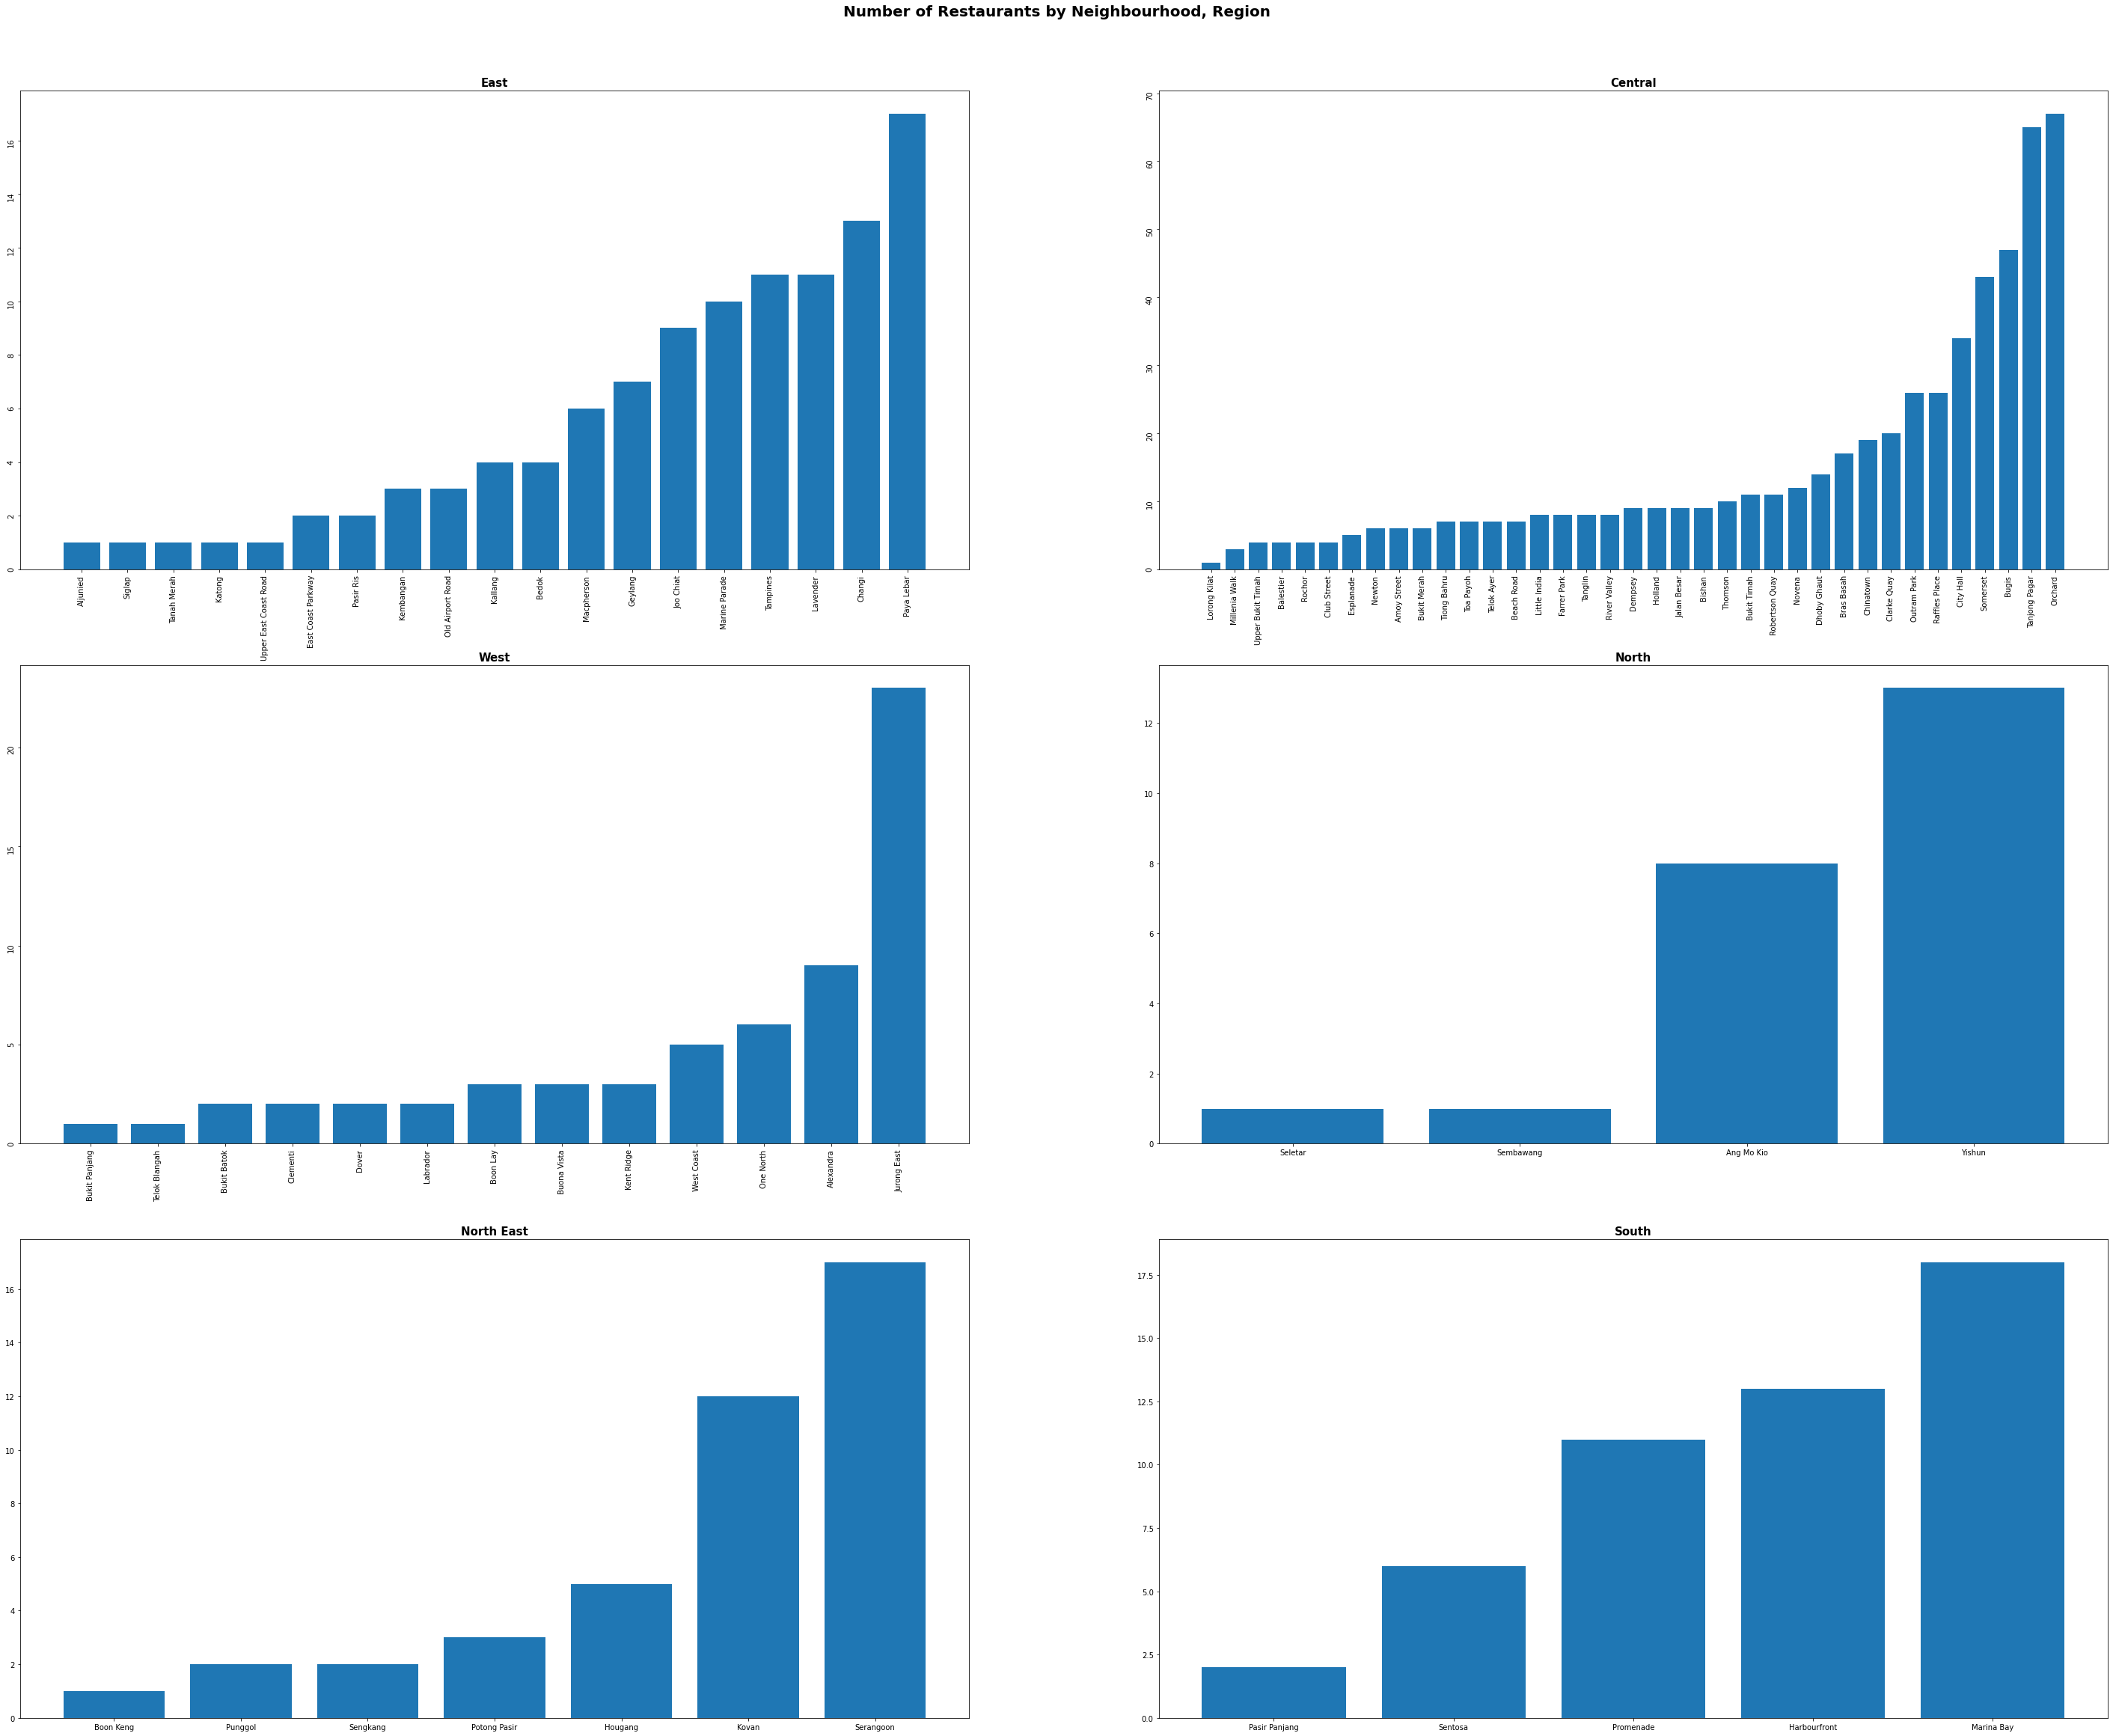

In [ ]:

fig, axs = plt.subplots(3,2, figsize=(50, 40))
axs[0][0].bar(num_rest_by_neighbourhood_East['neighbourhood'], num_rest_by_neighbourhood_East['url'])
axs[0][1].bar(num_rest_by_neighbourhood_Central['neighbourhood'], num_rest_by_neighbourhood_Central['url'])
axs[1][0].bar(num_rest_by_neighbourhood_West['neighbourhood'], num_rest_by_neighbourhood_West['url'])
axs[1][1].bar(num_rest_by_neighbourhood_North['neighbourhood'], num_rest_by_neighbourhood_North['url'])
axs[2][0].bar(num_rest_by_neighbourhood_NE['neighbourhood'], num_rest_by_neighbourhood_NE['url'])
axs[2][1].bar(num_rest_by_neighbourhood_South['neighbourhood'], num_rest_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Restaurants by Region

In [ ]:
num_rest_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Restaurants by Region')

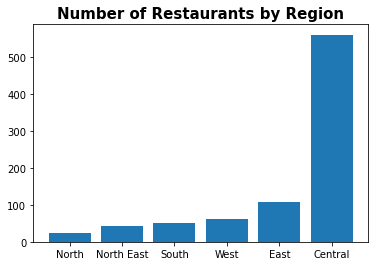

In [ ]:
plt.bar(num_rest_by_region['region'],num_rest_by_region['url'])
plt.title('Number of Restaurants by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Reviews by Neighbourhood

In [ ]:
num_reviews_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_North= pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

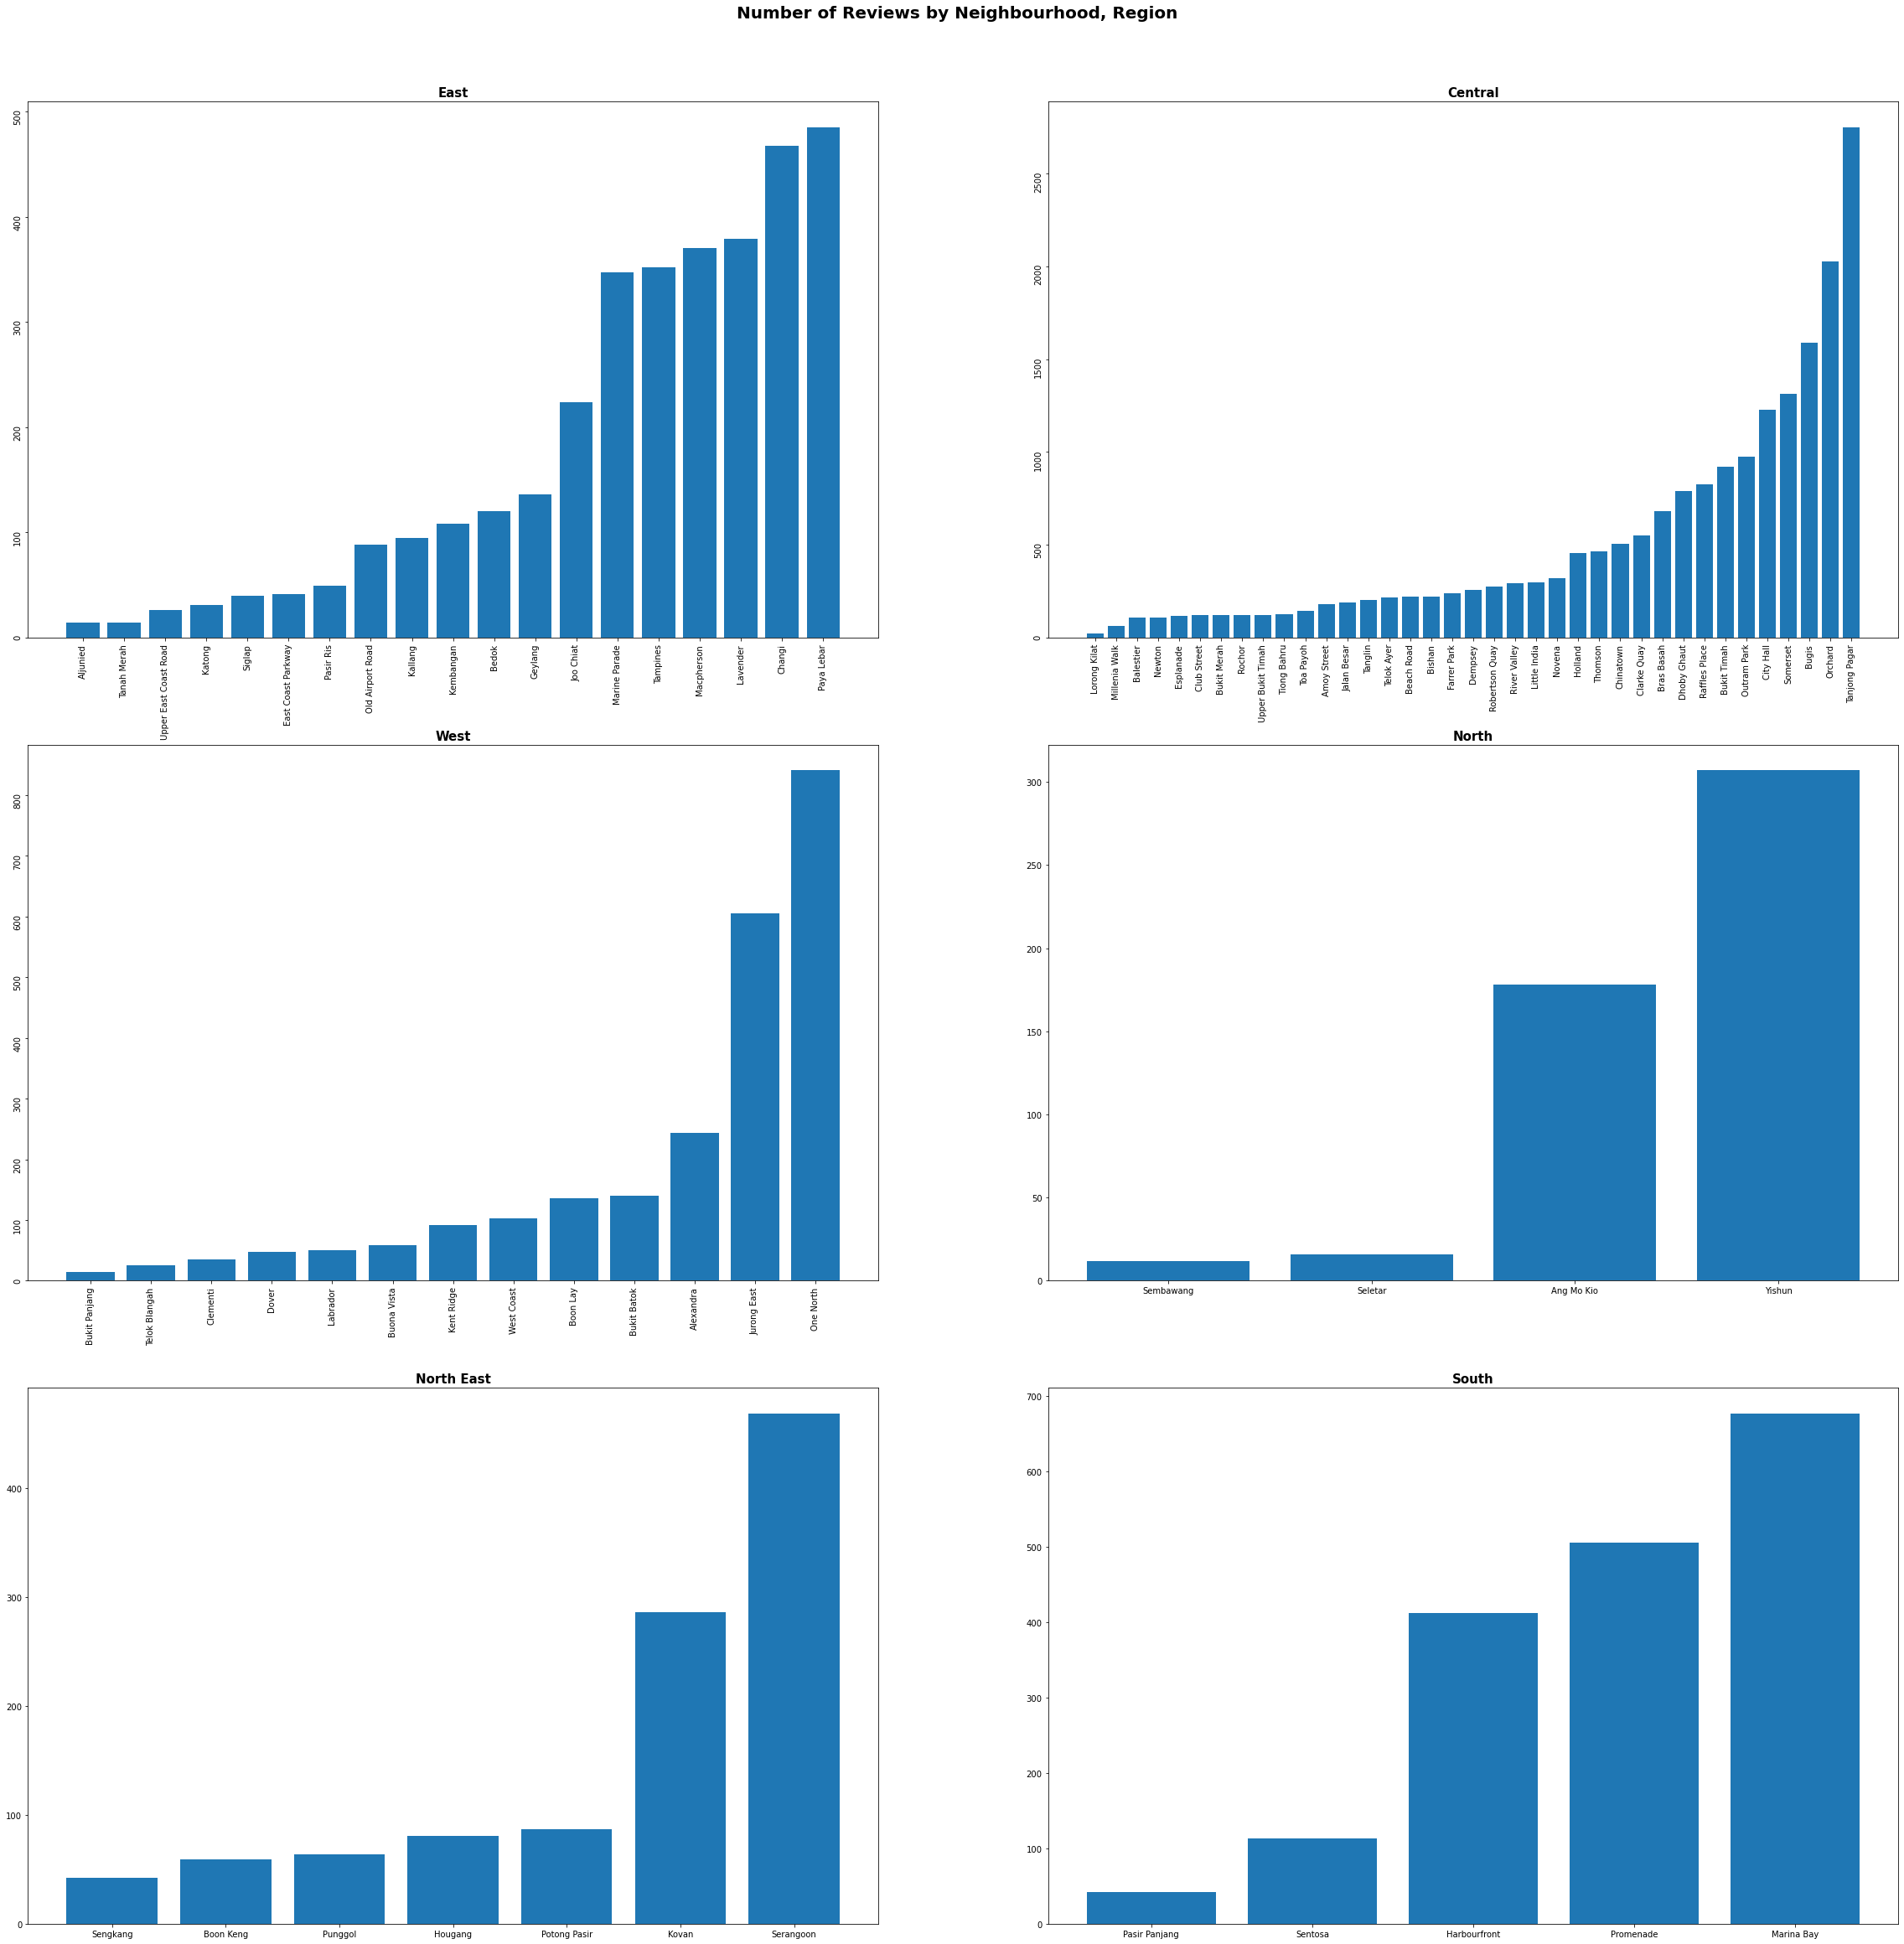

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(40, 40))
axs[0][0].bar(num_reviews_by_neighbourhood_East['neighbourhood'], num_reviews_by_neighbourhood_East['url'])
axs[0][1].bar(num_reviews_by_neighbourhood_Central['neighbourhood'], num_reviews_by_neighbourhood_Central['url'])
axs[1][0].bar(num_reviews_by_neighbourhood_West['neighbourhood'], num_reviews_by_neighbourhood_West['url'])
axs[1][1].bar(num_reviews_by_neighbourhood_North['neighbourhood'], num_reviews_by_neighbourhood_North['url'])
axs[2][0].bar(num_reviews_by_neighbourhood_NE['neighbourhood'], num_reviews_by_neighbourhood_NE['url'])
axs[2][1].bar(num_reviews_by_neighbourhood_South['neighbourhood'], num_reviews_by_neighbourhood_South['url'])

fig.suptitle('Number of Reviews by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Reviews by Region

In [ ]:
num_reviews_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Reviews by Region')

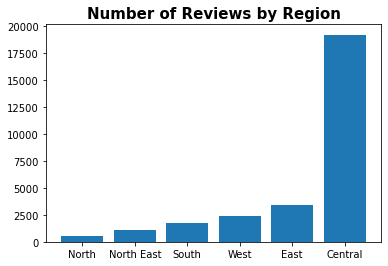

In [ ]:
plt.bar(num_reviews_by_region['region'],num_reviews_by_region['url'])
plt.title('Number of Reviews by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Restaurants by Category

In [ ]:
rest_cat_df = cleaned_data.iloc[:, cleaned_data.columns.get_loc('cleaned_categories')+1:-1]
rest_cat_df['url'] = cleaned_data['url']


In [ ]:
rest_cat_counts = rest_cat_df.drop_duplicates(['url'])
rest_cat_counts = pd.DataFrame(rest_cat_counts.sum()).reset_index().iloc[:-1,:].sort_values(0)

In [ ]:
rest_cat_counts

,index,0
6,Good Environment,10
4,BBQ,13
26,Novel,14
2,Indian,15
28,Bites,20
18,Fast Food,20
9,Rainy Day Comforts,21
0,Healthy,22
16,Buffets,23
21,Fine Dining,24


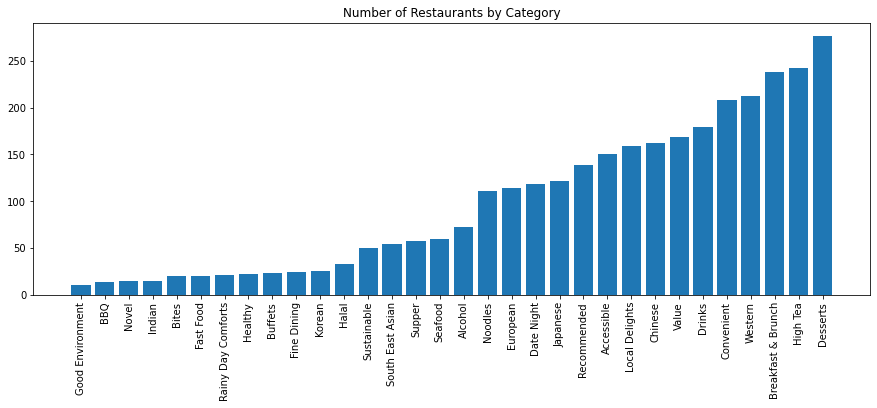

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(rest_cat_counts['index'], rest_cat_counts[0])
plt.xticks(rotation = 90)
plt.title('Number of Restaurants by Category')
plt.show()

#### Bar Chart of Reviews by Category

In [ ]:
reviews_cat_df = pd.DataFrame(rest_cat_df.sum()).reset_index().iloc[:-1,:].sort_values(0)

In [ ]:
reviews_cat_df

,index,0
2,Indian,280
6,Good Environment,341
4,BBQ,361
9,Rainy Day Comforts,444
21,Fine Dining,531
26,Novel,540
16,Buffets,585
18,Fast Food,723
31,Halal,885
8,Korean,886


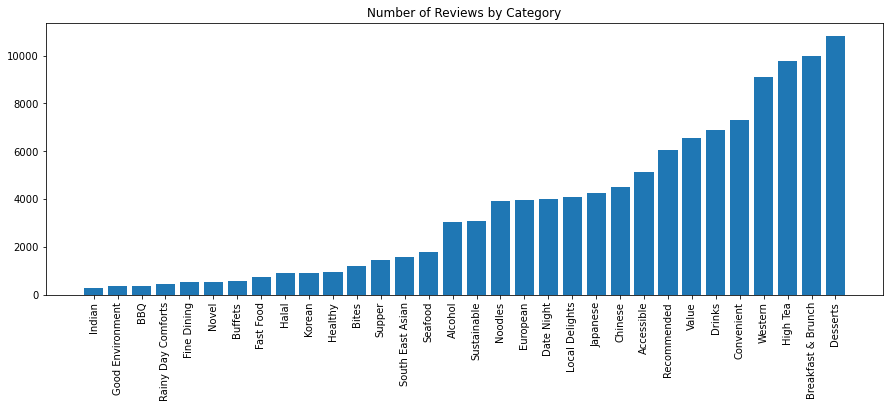

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(reviews_cat_df['index'], reviews_cat_df[0])
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Category')
plt.show()

#### Histogram of Number of reviews by Restaurant

In [ ]:
num_reviews_by_rest = pd.DataFrame(cleaned_data.groupby('url')['name'].count()).reset_index()

In [ ]:
num_reviews_by_rest.describe()

,name
count,845.000000
mean,33.491124
std,32.603084
min,10.000000
25%,16.000000
50%,24.000000
75%,38.000000
max,357.000000


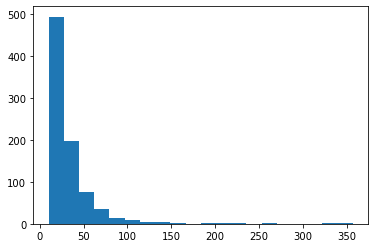

In [ ]:
plt.hist(num_reviews_by_rest['name'], bins = 20)
plt.show()

#### Box & Whiskers For Price By Category

In [ ]:
box_df = cleaned_data.drop_duplicates('url')

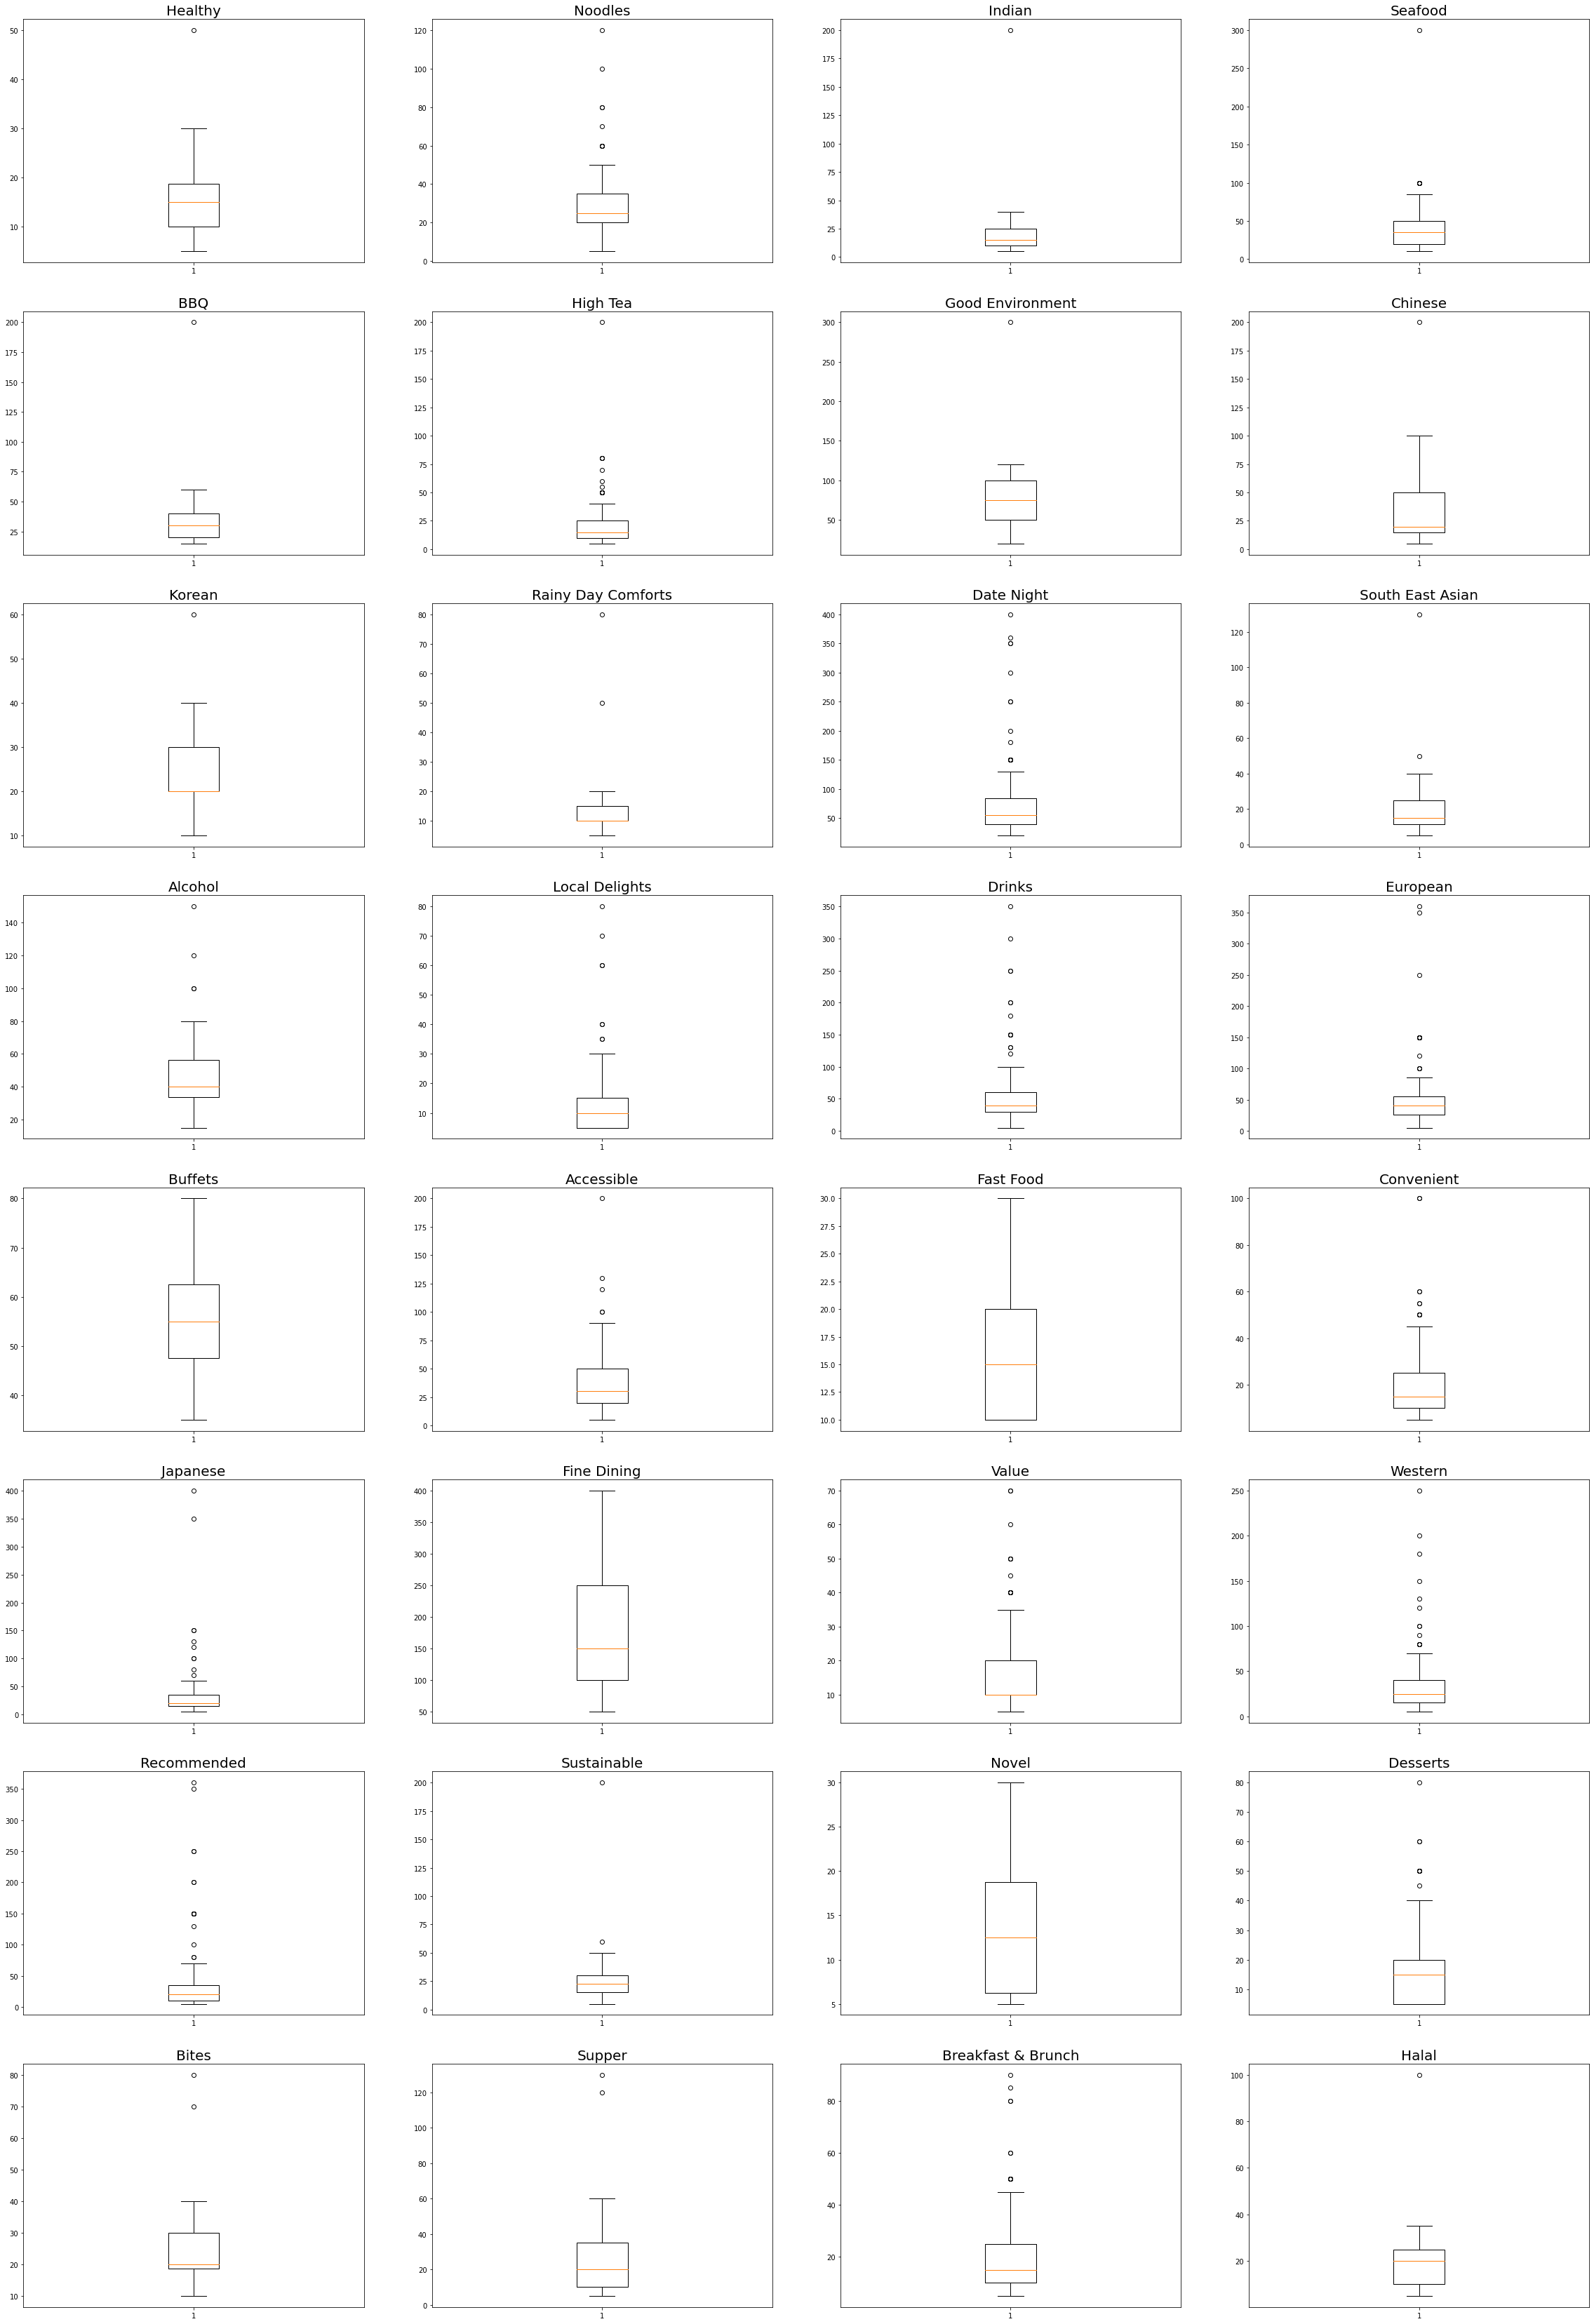

In [ ]:
fig, axs = plt.subplots(8,4, figsize=(40, 60))

for index, name in enumerate(list_cleaned_categories):
    cat_df = box_df[box_df[name] == 1]
    axs[index//4,index%4].boxplot(cat_df['cleaned_price'])
    axs[index//4,index%4].set_title(name, fontsize=20)
    


# for i in range(0,4):
#     for j in range(0,13):
#         for category in list_cleaned_categories:
#             cat_df = box_df[box_df[category] == 1]
#             axs[i][j].boxplot(cat_df['cleaned_price'])
            


#### Box & Whiskers for Price By Region

In [ ]:
box_df

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Western,Recommended,Sustainable,Novel,Desserts,Bites,Supper,Breakfast & Brunch,Halal,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,1,0,0,East
0,https://www.burpple.com/99-thai-story?bp_ref=%...,99 Thai Story,Bishan,~$15/pax,['Thai'],\nSteamed Fish with Lemon Garlic Sauce\nGotten...,Khaw Han Chung,"Jan 6, 2022",15.0,[South East Asian],...,0,0,0,0,0,0,0,0,0,Central
0,https://www.burpple.com/aburi-en-jem?bp_ref=%2...,Aburi-EN (Jem),Jurong East,~$25/pax,"['Delivery', 'Japanese']",\nAburi 9 Kinds Kaisen Chirashi Don | $35++\nF...,Iced Americano,5d ago,25.0,"[Convenient, Japanese]",...,0,0,0,0,0,0,0,0,0,West
0,https://www.burpple.com/ah-loy-thai?bp_ref=%2F...,Ah Loy Thai,Bugis,~$10/pax,"['Thai', 'Cheap & Good', 'Good For Groups']",\nTom yam fried rice\nThe tom yam fried rice w...,Ethel Tan,16m ago,10.0,"[South East Asian, Value, Accessible]",...,0,0,0,0,0,0,0,0,0,Central
0,https://www.burpple.com/ajummas?bp_ref=%2Ff%2F...,Ajumma's (Funan),City Hall,~$15/pax,"['Korean', 'Delivery']",\nCrispy Samgyeopsal With Creamy Scrambled Egg...,The Hungry Fatty,3h ago,15.0,"[Korean, Convenient]",...,0,0,0,0,0,0,0,0,0,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,https://www.burpple.com/9-plus-cafe?bp_ref=%2F...,9 Plus Cafe,Aljunied,~$5/pax,['Hawker Food'],\nBa Chor Mee\nFrom the stall that primarily s...,Thiam Peng Tan,Jul 6 at 12:43am,5.0,[Local Delights],...,0,0,0,0,0,0,0,0,0,East
0,https://www.burpple.com/49-seats-4?bp_ref=%2Ff...,49 Seats (The Centrepoint),Somerset,~$20/pax,"['Western', 'Pasta']",\nSprite & Coke Float \n\nSprite float & Coke ...,Zoey Belle,9m ago,20.0,"[Western, Western, Noodles]",...,1,0,0,0,0,0,0,0,0,Central
0,https://www.burpple.com/alexandra-village-food...,Alexandra Village Food Centre,Alexandra,~$10/pax,"['Hawker Food', 'Cheap & Good']",\nGood oyster omelette \nOyster omelette @ $7\...,Gerard Lim,4m ago,10.0,"[Local Delights, Value]",...,0,0,0,0,0,0,0,0,0,West
0,https://www.burpple.com/abc-brickworks-market-...,ABC Brickworks Market & Food Centre,Bukit Merah,~$10/pax,"['Burpple Guides', 'Hawker Food', 'Cheap & Good']",\nJuicy chicken wings and get the chicken sata...,Jason Ng,14m ago,10.0,"[Recommended, Local Delights, Value]",...,0,1,0,0,0,0,0,0,0,Central


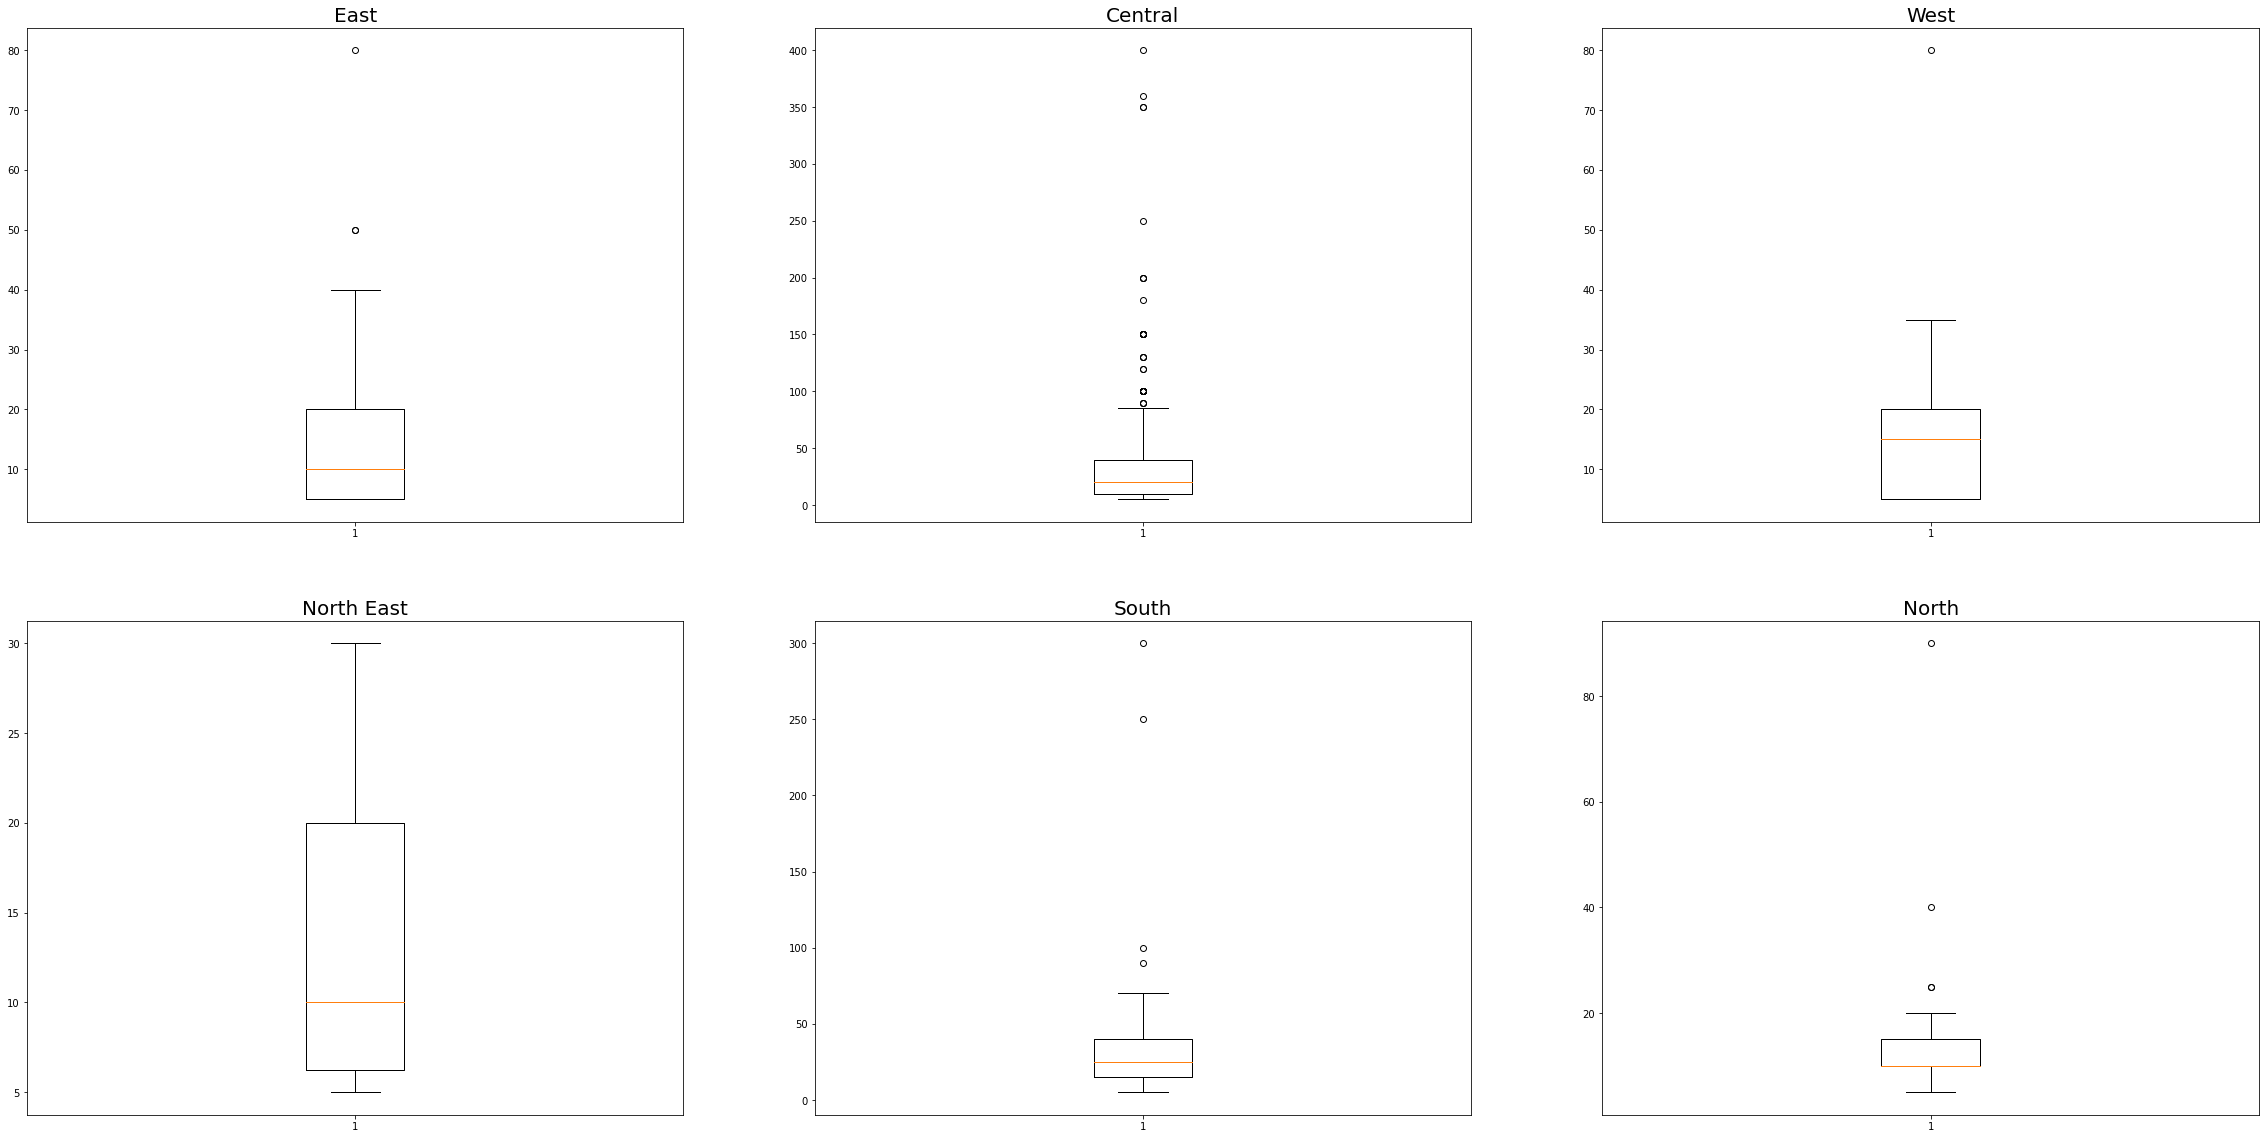

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(40, 20))

for index, name in enumerate(box_df['region'].unique()):
    cat_df = box_df[box_df['region'] == name]
    axs[index//3,index%3].boxplot(cat_df['cleaned_price'])
    axs[index//3,index%3].set_title(name, fontsize=20)


#### Histogram for Price

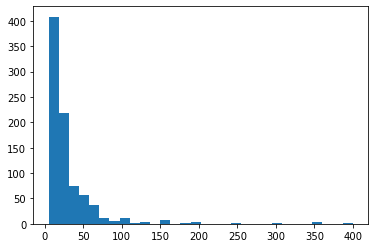

In [ ]:
plt.hist(box_df['cleaned_price'], bins = 30) ## find the x limit thing
plt.show()

#### Number of Reviews by Date

In [ ]:
cal_dict = dict((month, index) for index, month in enumerate(calendar.month_abbr) if month)

In [ ]:
cleaned_dates = []
for idx, row in cleaned_data.iterrows():
    dt = row['date'].strip()
    if 'ago' in dt:
        if 'm' in dt or 'h' in dt or 's' in dt:
            cleaned_dates.append(date(2023, 3, 15))
        elif 'week' in dt:
            cleaned_dates.append(date(2023, 3, 8))
        else:
            dt_new = int(dt.replace('d ago', ''))
            dt_new = 15- dt_new
            cleaned_dates.append(date(2023, 3, dt_new))
            
    elif 'at' in dt:
        mth_day = dt.split(' ')
        new_date = date(2023, cal_dict[mth_day[0]], int(mth_day[1]))
        if new_date > date(2023,3,15):
            cleaned_dates.append(date(2022,cal_dict[mth_day[0]], int(mth_day[1])))
        else:
            cleaned_dates.append(date(2023, cal_dict[mth_day[0]], int(mth_day[1])))
    
    else:
        mth_day = dt.split(',')[0].split(' ')
        cleaned_dates.append(date(int(dt.split(',')[-1]), cal_dict[mth_day[0]], int(mth_day[1])))

In [ ]:
cleaned_data['cleaned_dates'] = cleaned_dates

In [ ]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Recommended,Sustainable,Novel,Desserts,Bites,Supper,Breakfast & Brunch,Halal,region,cleaned_dates
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,1,0,0,East,2023-03-15
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,1,0,0,East,2022-07-30
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,1,0,0,East,2022-07-30
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,1,0,0,East,2022-07-30
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,1,0,0,East,2022-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-27
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-26
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-09
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,0,Central,2020-10-01


In [ ]:
from dateutil.parser import parse
dt = parse('Mon Feb 15 2010')
cleaned_data['mmyyyy'] = cleaned_data['cleaned_dates'].apply(lambda x: date(x.year, x.month, 1))

In [ ]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Sustainable,Novel,Desserts,Bites,Supper,Breakfast & Brunch,Halal,region,cleaned_dates,mmyyyy
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,1,0,0,East,2023-03-15,2023-03-01
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,1,0,0,East,2022-07-30,2022-07-01
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,1,0,0,East,2022-07-30,2022-07-01
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,1,0,0,East,2022-07-30,2022-07-01
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,1,0,0,East,2022-07-30,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-27,2020-10-01
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-26,2020-10-01
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-09,2020-10-01
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Accessible]",...,0,0,0,0,0,0,0,Central,2020-10-01,2020-10-01


In [ ]:
df_by_month = cleaned_data.groupby('mmyyyy')['url'].count().reset_index().iloc[:-1, :]
df_by_month

,mmyyyy,url
0,2020-01-01,944
1,2020-02-01,946
2,2020-03-01,1163
3,2020-04-01,497
4,2020-05-01,393
5,2020-06-01,522
6,2020-07-01,840
7,2020-08-01,1148
8,2020-09-01,1102
9,2020-10-01,1218


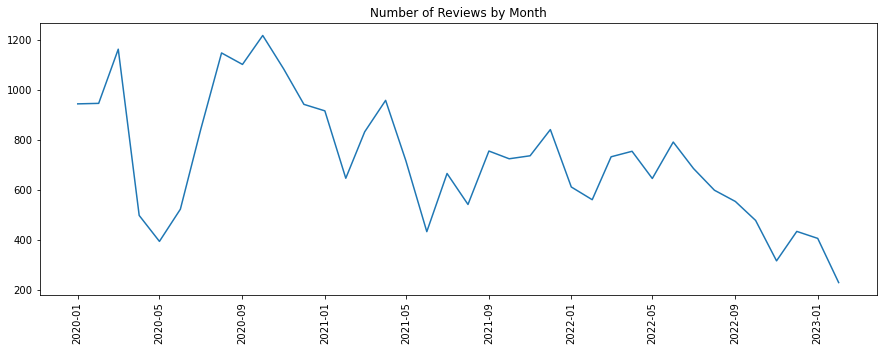

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_by_month['mmyyyy'],df_by_month['url'] )
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Month')
plt.show()


In [ ]:
df_by_date = cleaned_data.groupby('cleaned_dates')['url'].count().reset_index().iloc[:-15,:]
df_by_date

,cleaned_dates,url
0,2020-01-01,41
1,2020-01-02,37
2,2020-01-03,38
3,2020-01-04,28
4,2020-01-05,56
...,...,...
1149,2023-02-24,8
1150,2023-02-25,9
1151,2023-02-26,22
1152,2023-02-27,2


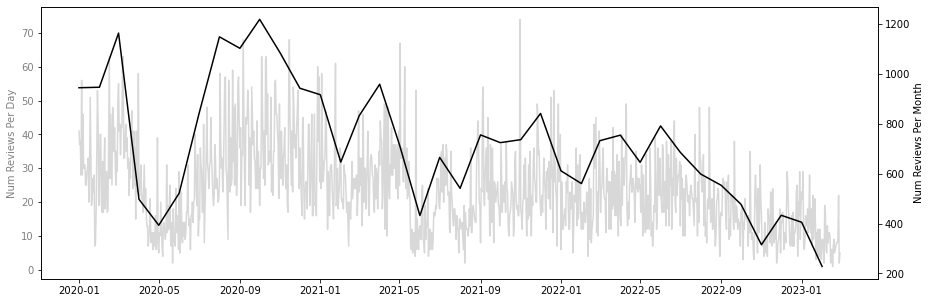

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,5))
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

ax1.plot(df_by_date['cleaned_dates'],df_by_date['url'],  color = 'grey', alpha = 0.3)
ax1.set_ylabel('Num Reviews Per Day', color = 'grey')
ax1.tick_params(axis = 'y', labelcolor = 'grey')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(df_by_month['mmyyyy'],df_by_month['url'], color = 'black')
ax2.set_ylabel('Num Reviews Per Month')
ax2.grid(False)

# plt.xticks(rotation = 90)
# plt.title('Number of Reviews by Date')
# plt.show()